## Background

`I conduted this project for one of the fastest growing startups, XYG (not real name of company) in the logistics and delivery domain. Company XYG works with several partners and make on-demand delivery to their customers. During the COVID-19 pandemic, they were faced with several different challenges and everyday they tried to address these challenges. As a growing startup, with a global expansion strategy XYG's primary strategy was to make their customers happy and the only way to do that was to measure the happiness of each of their customer. They were intereted in predicting what made their customers happy or unhappy so as to take the necessary actions to improve customer's satisfaction. Getting feedback from their customers was not easy either, but they had a culture of getting constant feedbacks from their customers. They did a survey to a select customer cohort. I was presented with a subset of this data with the goal to predict if a customer is happy or not based on the answers they give to questions asked.`

## Import Libraries

In [1]:
# data processing
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data wrangling
from scipy.stats import randint as sp_randint
import numpy as np

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

#### Load the Data...

In [2]:
# get the data
survey_df = pd.read_csv("ACME-HappinessSurvey2020.csv")

## Exploratory Data Analysis

In [3]:
# Display the data
survey_df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
# Display data type
survey_df.dtypes

Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

In [5]:
# Find missing values
survey_df.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

` We can already observe that there are no missing values in the dataset and that all the columns are integers. `

### A description of the features is listed below:

---

   Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.
   
      Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
      X1 = my order was delivered on time
      X2 = contents of my order was as I expected
      X3 = I ordered everything I wanted to order
      X4 = I paid a good price for my order
      X5 = I am satisfied with my courier
      X6 = the app makes ordering easy for me

In [6]:
# display general statistics of data
survey_df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


`From the statistics above, in terms of ordered content, most of the customers expectations were sort of dashed. This metric received the lowest average in terms of satisfaction (2.5)`

In [7]:
# show column names
survey_df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [8]:
# create a correlation matrix
corr_matrix = survey_df.corr()

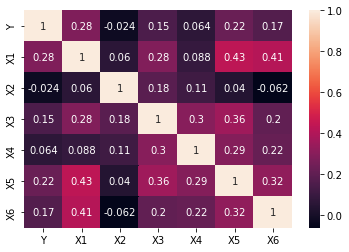

In [9]:
# Visual representation of correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
# Filter the unhappy and happy customers
unhappy = survey_df.loc[survey_df["Y"]==0, :]
happy = survey_df.loc[survey_df["Y"]==1,:]

c:\Users\evans\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\evans\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

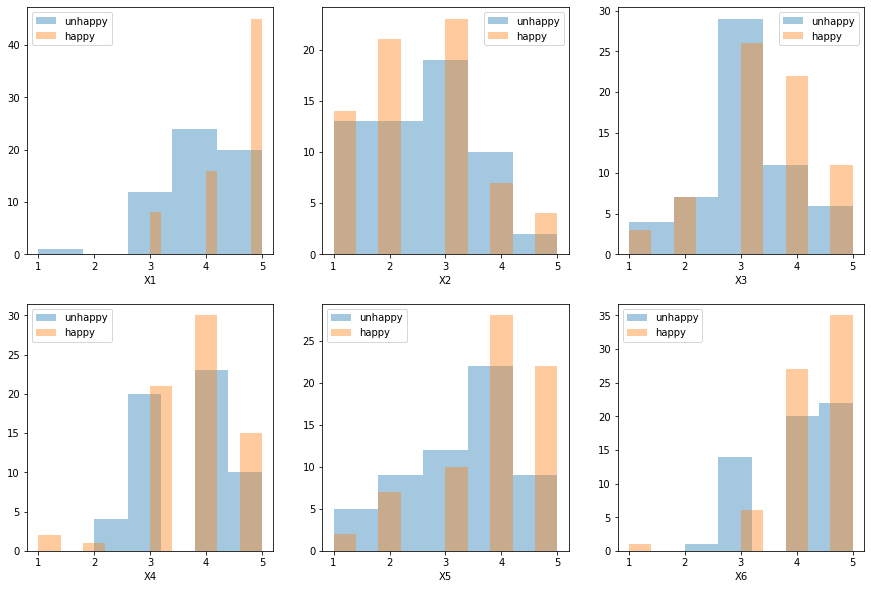

In [11]:
# create a histogram distribution of all features according to customers satisfaction
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax = sns.distplot(unhappy["X1"], label = "unhappy", kde=False, bins =5, ax = axes[0,0])
ax = sns.distplot(happy["X1"], label = "happy", kde=False, bins =10, ax = axes[0,0])
ax.legend()
ax = sns.distplot(unhappy["X2"], label = "unhappy", kde=False, bins =5, ax = axes[0,1])
ax = sns.distplot(happy["X2"], label = "happy", kde=False, bins =10, ax = axes[0,1])
ax.legend()
ax = sns.distplot(unhappy["X3"], label = "unhappy", kde=False, bins =5, ax = axes[0,2])
ax = sns.distplot(happy["X3"], label = "happy", kde=False, bins =10, ax = axes[0,2])
ax.legend()
ax = sns.distplot(unhappy["X4"], label = "unhappy", kde=False, bins =5, ax = axes[1,0])
ax = sns.distplot(happy["X4"], label = "happy", kde=False, bins =10, ax = axes[1,0])
ax.legend()
ax = sns.distplot(unhappy["X5"], label = "unhappy", kde=False, bins =5, ax = axes[1,1])
ax = sns.distplot(happy["X5"], label = "happy", kde=False, bins =10, ax = axes[1,1])
ax.legend()
ax = sns.distplot(unhappy["X6"], label = "unhappy", kde=False, bins =5, ax = axes[1,2])
ax = sns.distplot(happy["X6"], label = "happy", kde=False, bins =10, ax = axes[1,2])
ax.legend()
plt.show()

### Pre - Modelling

Define the features set, by copying the `surver_df` DataFrame and dropping the `Y` column.

In [12]:
# Define features set
X = survey_df.copy()
X.drop('Y', axis=1, inplace=True)
X.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


Create the target vector by assigning the values of the `Y` column from the `survey_df` DataFrame.

In [13]:
# Define target vector
y = np.ravel(survey_df["Y"])
y[:5]


array([0, 0, 1, 0, 0], dtype=int64)

In [14]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [15]:
# shape of training data
X_train.shape

(100, 6)

In [16]:
# shape of testing data
X_test.shape

(26, 6)

## Machine Learning Models
`Below, lets try out different models and compare their accuracy score`

#### Stochastic gradient descent (SGD) learning

In [17]:
# create a SGD classifier instance
sgd = linear_model.SGDClassifier(max_iter=200, tol=None, random_state=50)

# Fitting the model
sgd.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = sgd.predict(X_test)

# Display the accuracy score for the test dataset.
acc_sgd = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_sgd,2,)} %")

accuracy_score: 57.69 %


#### Random Forest Learning

In [18]:
# create a random forest instance
random_forest = RandomForestClassifier(n_estimators=100, random_state=50)

# Fitting the model
random_forest.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = random_forest.predict(X_test)

# Display the accuracy score for the test dataset.
acc_random_forest = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_random_forest,2,)} %")

accuracy_score: 53.85 %


#### Logistic Regression Model

In [19]:
# create a logistic regression instance
logreg = LogisticRegression(max_iter=200, random_state=78)

# Fitting the model
logreg.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = logreg.predict(X_test)

# Display the accuracy score for the test dataset.
acc_log = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_log,2,)} %")

accuracy_score: 61.54 %


#### Perceptron Learning Model

In [20]:
# create a perceptron instance
perc = Perceptron(random_state=101)

# Fitting the model
perc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = perc.predict(X_test)

# Display the accuracy score for the test dataset.
acc_perc = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_perc,2,)} %")

accuracy_score: 50.0 %


#### Linear Support Vector Model

In [21]:
# create a linear SVC instance
linear_svc = LinearSVC( max_iter=5000)

# Fitting the model
linear_svc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = linear_svc.predict(X_test)

# Display the accuracy score for the test dataset.
acc_linear_svc = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_linear_svc,2,)} %")

accuracy_score: 61.54 %


#### Gradient Boosting Model

In [22]:
# create a gradient boosting instance
gbc=GradientBoostingClassifier(n_estimators=100, random_state=50)

# Fitting the model
gbc.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = gbc.predict(X_test)

# Display the accuracy score for the test dataset.
acc_gbc = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_gbc,2,)} %")

accuracy_score: 50.0 %


#### Decision Tree Model

In [23]:
# create a decision tree classifier instance
decision_tree = DecisionTreeClassifier(random_state=50)
# Fitting the model
decision_tree.fit(X_train, y_train)

# Making predictions using the testing data
y_pred = decision_tree.predict(X_test)

# Display the accuracy score for the test dataset.
acc_decision_tree = accuracy_score(y_test, y_pred) * 100
print(f"accuracy_score: {round(acc_decision_tree,2,)} %")

accuracy_score: 50.0 %


In [24]:
# compile scores for all models into a dataframe
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Logistic Regression', 'Support Vector Machines',
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_gbc, acc_log, acc_linear_svc,
              acc_random_forest, acc_perc, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False).set_index('Score')
result_df

,Model
Score,
61.538462,Logistic Regression
61.538462,Support Vector Machines
57.692308,Stochastic Gradient Decent
53.846154,Random Forest
50.000000,Gradient Boosting
50.000000,Perceptron
50.000000,Decision Tree


`From the table above, Logistic Regression Model had the highest accuracy score while the Decision Tree Model had the least accuracy score. Let's perform resampling using "Cross-validation" on both models (i.e., the logistic regression and decision tree model) to protect against overfitting because of the small size of our data.`

##### Cross-validation for logistic regression Model

In [25]:
# Import cross val score 
from sklearn.model_selection import cross_val_score

# create a stochastic gradient descent model instance
logreg = LogisticRegression(max_iter=200, random_state=78)

# set cross validation splitting strategy to 5
scores_logreg = cross_val_score(logreg, X_train, y_train, 
                                        cv=5, scoring = "accuracy")

# cross validation score for stochastic gradient descent model
print("Scores_logreg:", scores_logreg)
print("Mean_logreg:", scores_logreg.mean())
print("Standard Deviation_logreg:", scores_logreg.std())

Scores_logreg: [0.5  0.45 0.55 0.6  0.5 ]
Mean_logreg: 0.52
Standard Deviation_logreg: 0.05099019513592784


##### Cross-validation for decision tree Model

In [26]:
# Import cross val score 
from sklearn.model_selection import cross_val_score

# create a stochastic gradient descent model instance
decision_tree = DecisionTreeClassifier(random_state=50)

# set cross validation splitting strategy to 5
scores_decision_tree = cross_val_score(decision_tree, X_train, y_train, 
                                        cv=5, scoring = "accuracy")

# cross validation score for stochastic gradient descent model
print("Scores_dec_tree:", scores_decision_tree)
print("Mean_dec_tree:", scores_decision_tree.mean())
print("Standard Deviation_dec_tree:", scores_decision_tree.std())

Scores_dec_tree: [0.55 0.55 0.7  0.65 0.55]
Mean_dec_tree: 0.6
Standard Deviation_dec_tree: 0.06324555320336755


`Under cross-validation, Logistic Regression Model had an accuracy score of approx. 52% with a margin error of 5%, while the Deicion Tree model had an accuracy score of approx. 60% with an error margin of 6%.`

### Feature Importance
`To futher improve accuracy score, decide on which feature to drop from dataset?`

In [27]:
# Random Forests in sklearn will automatically calculate feature importance
# We can then sort the features by their importance
importances = pd.DataFrame(sorted(zip(random_forest.feature_importances_, X.columns), reverse=True))
importances = importances.rename(columns={0:'importance', 1:'feature'})
importances = importances.set_index(['feature'])
importances

,importance
feature,
X3,0.203152
X6,0.172898
X2,0.165996
X1,0.154654
X5,0.154514
X4,0.148786


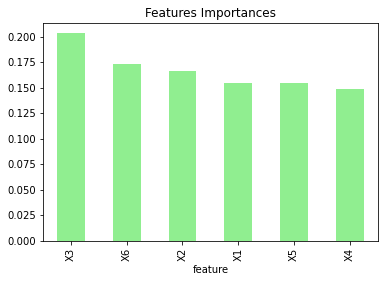

In [28]:
# Visualize the features by importance
importances.plot.bar(color='lightgreen', title= 'Features Importances', legend=False)

`From the feature importance chart, it appears that all feature may be significant when predicting a customer's happiness since their feature ranks in the same range. Thus all feature needs to be preserved in the next survey.`

#### K Nearest Neighbors Model
`Let's try K_Nearest Neighbors Model `

In [29]:
# loop through selected range to determine best score
# initialize variable to hold highest accuracy score
highest_score = 0

# loop 
for i in range(1,30):
    kNN_model=KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred=kNN_model.predict(X_test)
    # print accuracy score for each n_neighbors
    score = balanced_accuracy_score(y_pred, y_test)
    
    if score > highest_score:
        highest_score = score
        n_neighbors = i
# print best accuracy score
print(f"n_neighbors: {n_neighbors} ---> Best accuracy Score: {round(highest_score,4)}")

n_neighbors: 23 ---> Best accuracy Score: 0.7444


In [30]:
# create a knn model and fit data
kNN_model=KNeighborsClassifier(n_neighbors=23).fit(X_train, y_train)
# predict using the test data
y_pred=kNN_model.predict(X_test)
# Display the accuracy score for the test dataset.
print(balanced_accuracy_score(y_pred, y_test))

0.744360902255639


## HyperParameter Tuning

`Now let's tune the logistic regression model to estimate the best hyperparameters that could further improve the accuracy score.`

#### Randomized SearchCV Tuning with logistic regression

In [31]:
# Tune the parameters to improve the accuracy
def tune_logreg_hyper_params( X_train, y_train):
    # Import modules
    from sklearn import linear_model
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import RandomizedSearchCV
    
    print ("-- {} --".format("Fine-tuning logistic regression classifier"))
    
    # initialize the hyperparameters
    penalty = [ 'l2'] 
    solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
    c_values = sp_randint(0.01, 100)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # input parameters
    param_dist = dict(
                        solver = solvers,
                        penalty=penalty,
                        C = c_values
                )

    # build logistic regression instance 
    logreg = LogisticRegression(max_iter=200, random_state=78)

    # Randomized search
    random_search = RandomizedSearchCV(estimator=logreg, 
                                        param_distributions=param_dist, 
                                        n_jobs=-1,
                                        scoring='f1',
                                        error_score=0,
                                        cv= cv,
                                        verbose= 1)

    print ("--------------------- RandomizedSearchCV begins")
    random_search.fit(X_train, y_train)
    print ("--------------------- RandomizedSearchCV ends")

    return random_search.best_params_, random_search.best_score_ 

tune_logreg_hyper_params(X_train, y_train)

-- Fine-tuning logistic regression classifier --
--------------------- RandomizedSearchCV begins
Fitting 30 folds for each of 10 candidates, totalling 300 fits
--------------------- RandomizedSearchCV ends


c:\Users\evans\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


({'C': 71, 'penalty': 'l2', 'solver': 'saga'}, 0.6166107966107965)

##### Best hyper parameter using RandomizedSearchCV with logistic regression classifier

In [32]:
  # build logistic regression instance 
logreg = LogisticRegression(max_iter=200, 
                              random_state=78,
                              penalty= 'l2',
                              solver ='liblinear',
                              C= 48
                         )

# # Fitting the model
logreg.fit(X_train, y_train)

# # Making predictions using the testing data
y_pred_tuned = logreg.predict(X_test)

# Display the accuracy score for the test dataset.
acc_logreg_tuned = accuracy_score(y_test, y_pred_tuned) * 100
print(f"accuracy_score: {round(acc_logreg_tuned,2,)} %")

accuracy_score: 61.54 %


`The logistic regression when tuned had a best score of approx. 62%. However when the logistic regression model was re-evaluated using the tuned hyperparameters, the accuracy score did not change. Because our cross validation showed a better accuracy score under decision tree Model, I therefore decided to repeat the tuning below using the Decision tree classifier`

#### Randomized SearchCV Tuning with Decision Tree Classifier

In [33]:
# Tune the parameters to improve the accuracy
def tune_decision_tree_hyperparams( X_train, y_train):
    # Import modules
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import RandomizedSearchCV
    
    print ("-- {} --".format("Fine-tuning decision tree Classifier"))
    
    # initialize the hyperparameters
    criterion = ['gini', 'entropy']
    splitter = ['best', 'random']
    min_samples_leaf= sp_randint(1,500)
    min_samples_split= sp_randint(2,700) 
    max_leaf_nodes = sp_randint(2,1000)
    n_iter_search = 1000

    # input parameters
    param_dist = dict(
                        criterion=criterion,
                        splitter=splitter,
                        min_samples_leaf = min_samples_leaf,
                        min_samples_split =min_samples_split,
                        max_leaf_nodes=max_leaf_nodes
                    )

    # create decisionTree instance 
    decision_tree = DecisionTreeClassifier(random_state = 78)

    # Randomized search
    random_search = RandomizedSearchCV(estimator=decision_tree, 
                                        param_distributions=param_dist, 
                                        n_jobs=-1,
                                        n_iter= n_iter_search, 
                                        cv=10,
                                        verbose =1 )

    print ("--------------------- RandomizedSearchCV begins")
    random_search.fit(X_train, y_train)
    print ("--------------------- RandomizedSearchCV ends")

    return random_search.best_params_, random_search.best_score_ 

tune_decision_tree_hyperparams(X_train, y_train)

-- Fine-tuning decision tree Classifier --
--------------------- RandomizedSearchCV begins
Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
--------------------- RandomizedSearchCV ends


({'criterion': 'gini',
  'max_leaf_nodes': 38,
  'min_samples_leaf': 5,
  'min_samples_split': 7,
  'splitter': 'random'},
 0.6499999999999999)

##### Best hyper parameter for RandomizedSearchCV with DecisionTree classifier

In [34]:
# build decisionTree instance with tuned paramaters
decision_tree_tuned =DecisionTreeClassifier (criterion='gini',
                                             splitter='best',
                                             min_samples_leaf = 21,
                                             min_samples_split =38,
                                             max_leaf_nodes =179
                                        )

# Fitting the model
decision_tree_tuned.fit(X_train, y_train)

# Making predictions using the testing data
y_pred_tuned = decision_tree_tuned.predict(X_test)

# Display the accuracy score for the test dataset.
acc_decision_tree = accuracy_score(y_test, y_pred_tuned) * 100
print(f"accuracy_score: {round(acc_decision_tree,2,)} %")

accuracy_score: 73.08 %


`The accuracy score improves further under decision tree model. Now that we have a proper model, we can start evaluating it's performace in a more accurate way.`

## Further evaluation

#### Confusion Matrix

In [35]:
# Function to plot heatmap of confusion matrix
def plot_conf_matrix (conf_matrix, dtype):
    class_names = ["Unhappy","Happy"]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual label', size =18)
    plt.xlabel('Predicted label', size =18)
    plt.title('Confusion Matrix for {0}'.format(dtype), size =20)

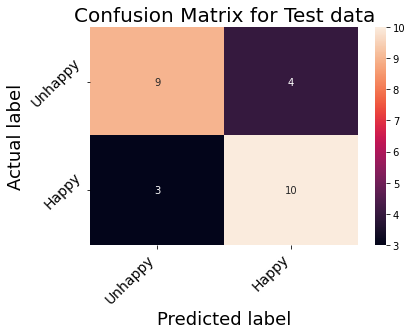

In [36]:
# Fitting the model using the tuned Decision Tree model
decision_tree_tuned.fit(X_train, y_train)
# plot confusion matrix
plot_conf_matrix(confusion_matrix(y_test, decision_tree_tuned.predict(X_test)), "Test data")

`The first row is about the unhappy customers: 9 customers were correctly classified as not happyy (i.e., true negatives) and 4 customers were wrongly classified as unhappy (false negatives). In the second row, 3 customers were wrongly classified as happy (i.e., false positives) and 10 were correctly classed as happy customers (i.e., true positives).`

#### Classification Report

In [37]:
# Import module for classification
from sklearn.metrics import classification_report

# create target names for classification
target_names = ["unhappy customers", "happy customers"]
print(classification_report(y_test, y_pred_tuned, target_names=target_names))

                   precision    recall  f1-score   support

unhappy customers       0.75      0.69      0.72        13
  happy customers       0.71      0.77      0.74        13

         accuracy                           0.73        26
        macro avg       0.73      0.73      0.73        26
     weighted avg       0.73      0.73      0.73        26



`Our model predicts 75% of the time that the customers are unhappy and 71% of the time that the customers are happy. The recall measures the correctness of the model in identifying true positives. Thus, the recall reveals that it predicted 69% of customers were unhappy out of actual unhappy customers while 77% were happy out of the actual happy customers.`
`We have a F-score of 72% and 74% for unhappy and happy customers, respectively. The score is not that high, because we have a recall of 69% for the unhappy customers and a precision of 71% for the happy customers. As a result of that, the classifier will only get a high F-score, if both recall and precision are high`

#### Precision Recall Curve

In [38]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = decision_tree_tuned.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)

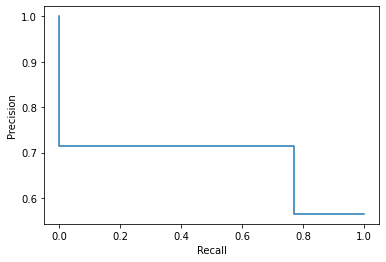

In [39]:
# Plot the precision and recall curve
from sklearn.metrics import PrecisionRecallDisplay
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()

### Summary


`This project aimed to predict if a customer was happy or not based on the answers they give to a series of survey on customer cohort. `

`The first step of this project was data exploration where I learnt about the structure of the dataset, checked for missing data estimated the correlation between each feature.  Afterwards I built 7 models and trained each of them. I also built a KNN classifier which returned an accuracy score of  74%. Further, I determined the accuracy score of the 7 models and selected the best (logistic regression model) as well as the least best (decision tree). The accuracy score estimated from the cross-validation method informed my decision to also tune the decision tree model for the best hyperparameters. The accuracy score under the cross-validation method was 60% and 52% but 50% and 62% without the cross-validation approach for the decision tree model and logistic regression model, respectively. After tuning both models, only the decision tree model achieved a higher accuracy score of 73%. Lastly I took a look at it's confusion matrix and computed the model's precision, recall and F-score`

`Further improvement can still be done to improve the result. For example, an extensive hyperparameter tuning on each of the other learning models. `